In [1]:
#Dependencies
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
csv_path_arrest = "police_pedestrian_stops_and_vehicle_stops.csv"

In [2]:
df_arrest = pd.read_csv(csv_path_arrest)
census_df = pd.read_csv("census_neighborhood_demographics_2010.csv")
census_df.head()

NBHD_ID       NBRHD_NAME  POPULATION_2010  HISPANIC_2010  WHITE_2010  \
0       32          Hampden          17547.0         2505.0     11750.0   
1        3            Baker           4879.0         1664.0      2854.0   
2       70  Washington Park           6905.0          295.0      6356.0   
3       13     Cherry Creek           5589.0          332.0      4896.0   
4       22     Country Club           3001.0           94.0      2740.0   

   BLACK_2010  NATIVEAM_2010  ASIAN_2010  HAWPACIS_2010  OTHER_2010  \
0      1963.0           64.0       726.0           20.0        38.0   
1       144.0           43.0        52.0           10.0         7.0   
2        28.0            9.0       119.0            3.0        13.0   
3        79.0           17.0       168.0            4.0         3.0   
4        20.0            8.0        77.0            1.0         5.0   

      ...      RENTED_AGE_25_TO_34  RENTED_AGE_35_TO_44  RENTED_AGE_45_TO_54  \
0     ...                   1363.0                791.0                700.0   
1     ...                    486.0                235.0                231.0   
2     ...                    329.0                132.0                 70.0   
3     ...                    521.0                261.0                211.0   
4     ...                     90.0                 55.0                 34.0   

   RENTED_AGE_55_TO_59  RENTED_AGE_60_TO_64  RENTED_AGE_65_TO_74  \
0                304.0                253.0                285.0   
1                113.0                 64.0                 82.0   
2                 31.0                 36.0                 27.0   
3                 79.0                 92.0                161.0   
4                 14.0                 17.0                  9.0   

   RENTED_AGE_75_TO_84  RENTED_AGE_85_PLUS  SHAPE_Length  SHAPE_Area  
0                200.0               229.0      0.200466    0.000768  
1                 23.0                 7.0      0.101767    0.000406  
2                  6.0                21.0      0.090445    0.000411  
3                224.0               207.0      0.063923    0.000228  
4                  4.0                 2.0      0.052865    0.000177  

[5 rows x 127 columns]

In [3]:
neighborhood_df = pd.read_csv("neighborhood_regions.csv")
region_arrests = pd.merge(df_arrest, neighborhood_df, left_on="NEIGHBORHOOD_NAME", right_on="NEIGHBORHOOD")
region_arrests.head()

MASTER_INCIDENT_NUMBER PRIORITY_DESCRIPTION       PROBLEM  \
0         DPD-12-0528225       P3 Public Need  Vehicle Stop   
1         DPD-12-0147770       P3 Public Need  Subject Stop   
2         DPD-12-0306079       P3 Public Need  Subject Stop   
3         DPD-12-0331882       P3 Public Need  Subject Stop   
4         DPD-15-0647708       P3 Public Need  Subject Stop   

                ADDRESS  CALL_CLASS     TIME_PHONEPICKUP  \
0  8500 W CRESTLINE AVE           2  2012-11-13 00:02:22   
1  8500 W CRESTLINE AVE           2  2012-04-11 00:22:38   
2  8500 W CRESTLINE AVE           2  2012-07-10 00:29:19   
3  8500 W CRESTLINE AVE           2  2012-07-24 04:40:57   
4  8500 W Crestline Ave           2  2015-11-05 00:37:02   

             CALL_DISPOSITION       GEO_X       GEO_Y     GEO_LON    GEO_LAT  \
0  K - Street Check Completed  3114742.65  1650362.34 -105.092691  39.618329   
1                 Arrest Made  3114742.65  1650362.34 -105.092691  39.618329   
2               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
3               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
4               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   

  DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_NAME NEIGHBORHOOD DENVER_REGION  \
0           4         423           Marston      Marston     Southwest   
1           4         423           Marston      Marston     Southwest   
2           4         423           Marston      Marston     Southwest   
3           4         423           Marston      Marston     Southwest   
4           4         423           Marston      Marston     Southwest   

   Unnamed: 2  Unnamed: 3  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [4]:
df_arrest['TIME_PHONEPICKUP'] = pd.to_datetime(df_arrest['TIME_PHONEPICKUP'])
df_arrest['YEAR'], df_arrest['MONTH'], df_arrest['HOUR'] = df_arrest['TIME_PHONEPICKUP'].dt.year, df_arrest['TIME_PHONEPICKUP'].dt.month, df_arrest['TIME_PHONEPICKUP'].dt.hour 
df_arrest.head()

MASTER_INCIDENT_NUMBER PRIORITY_DESCRIPTION       PROBLEM  \
0         DPD-12-0528225       P3 Public Need  Vehicle Stop   
1         DPD-12-0147770       P3 Public Need  Subject Stop   
2         DPD-12-0306079       P3 Public Need  Subject Stop   
3         DPD-12-0331882       P3 Public Need  Subject Stop   
4         DPD-15-0647708       P3 Public Need  Subject Stop   

                ADDRESS  CALL_CLASS    TIME_PHONEPICKUP  \
0  8500 W CRESTLINE AVE           2 2012-11-13 00:02:22   
1  8500 W CRESTLINE AVE           2 2012-04-11 00:22:38   
2  8500 W CRESTLINE AVE           2 2012-07-10 00:29:19   
3  8500 W CRESTLINE AVE           2 2012-07-24 04:40:57   
4  8500 W Crestline Ave           2 2015-11-05 00:37:02   

             CALL_DISPOSITION       GEO_X       GEO_Y     GEO_LON    GEO_LAT  \
0  K - Street Check Completed  3114742.65  1650362.34 -105.092691  39.618329   
1                 Arrest Made  3114742.65  1650362.34 -105.092691  39.618329   
2               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
3               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
4               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   

  DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_NAME  YEAR  MONTH  HOUR  
0           4         423           Marston  2012     11     0  
1           4         423           Marston  2012      4     0  
2           4         423           Marston  2012      7     0  
3           4         423           Marston  2012      7     4  
4           4         423           Marston  2015     11     0

In [5]:
df_arrest.columns

Index(['MASTER_INCIDENT_NUMBER', 'PRIORITY_DESCRIPTION', 'PROBLEM', 'ADDRESS',
       'CALL_CLASS', 'TIME_PHONEPICKUP', 'CALL_DISPOSITION', 'GEO_X', 'GEO_Y',
       'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID', 'NEIGHBORHOOD_NAME',
       'YEAR', 'MONTH', 'HOUR'],
      dtype='object')

In [6]:
df_arrest_clean = df_arrest.loc[:, ["CALL_DISPOSITION", "CALL_CLASS", "NEIGHBORHOOD_NAME", "ADDRESS", "YEAR", "MONTH", "HOUR"]]
df_arrest_clean.head()

CALL_DISPOSITION  CALL_CLASS NEIGHBORHOOD_NAME  \
0  K - Street Check Completed           2           Marston   
1                 Arrest Made           2           Marston   
2               Party Advised           2           Marston   
3               Party Advised           2           Marston   
4               Party Advised           2           Marston   

                ADDRESS  YEAR  MONTH  HOUR  
0  8500 W CRESTLINE AVE  2012     11     0  
1  8500 W CRESTLINE AVE  2012      4     0  
2  8500 W CRESTLINE AVE  2012      7     0  
3  8500 W CRESTLINE AVE  2012      7     4  
4  8500 W Crestline Ave  2015     11     0

In [7]:
call_dispo = df_arrest_clean.groupby('CALL_DISPOSITION')
neighbor_disp = call_dispo['CALL_CLASS'].count()

neighbor_disp.head(65)

CALL_DISPOSITION
1 - Alarm RP On Scene               527
1 - Alarm RP On Scene,2 - Alar        1
1 - Alarm RP On Scene,3 - Alar        1
1 - Alarm RP On Scene,Arrest M        7
1 - Alarm RP On Scene,Back Up         3
1 - Alarm RP On Scene,Detox Va        1
1 - Alarm RP On Scene,File Onl       11
1 - Alarm RP On Scene,GOA             1
1 - Alarm RP On Scene,In Servi       36
1 - Alarm RP On Scene,K - Stre       19
1 - Alarm RP On Scene,L - Clea        1
1 - Alarm RP On Scene,No Polic        3
1 - Alarm RP On Scene,O - Veh         1
1 - Alarm RP On Scene,Party Ad      188
1 - Alarm RP On Scene,Quit           16
1 - Alarm RP On Scene,Report M        6
1 - Alarm RP On Scene,T - Cita       54
1 - Alarm RP On Scene,UTL / Un        5
1 - Alarm RP On Scene,Vehicle         2
1 - Alarm RP On Scene,Warning        18
2 - Alarm False                     213
2 - Alarm False,Detox Van             1
2 - Alarm False,Party Advised         1
2 - Alarm False,Quit                  1
3 - Alarm Good         

In [8]:
rdfa = df_arrest_clean.loc[df_arrest_clean["CALL_DISPOSITION"] == "Arrest Made"]
rdfa = rdfa.drop_duplicates()
rdfa

CALL_DISPOSITION  CALL_CLASS             NEIGHBORHOOD_NAME  \
1            Arrest Made           2                       Marston   
36           Arrest Made           2                       Marston   
89           Arrest Made           2                Southmoor Park   
102          Arrest Made           2                Southmoor Park   
104          Arrest Made           2                Southmoor Park   
107          Arrest Made           2                Southmoor Park   
108          Arrest Made           2                Southmoor Park   
110          Arrest Made           2                          None   
111          Arrest Made           2                       Marston   
123          Arrest Made           2                       Marston   
149          Arrest Made           2                       Marston   
232          Arrest Made           2                          None   
414          Arrest Made           2                       Marston   
531          Arrest Made           2                       Marston   
565          Arrest Made           2                       Marston   
596          Arrest Made           2                       Marston   
599          Arrest Made           2                       Marston   
610          Arrest Made           2                          None   
612          Arrest Made           2                          None   
624          Arrest Made           2                          None   
627          Arrest Made           2                          None   
633          Arrest Made           2                          None   
642          Arrest Made           2                          None   
651          Arrest Made           2                          None   
658          Arrest Made           2                       Marston   
659          Arrest Made           2                       Marston   
662          Arrest Made           2                       Marston   
696          Arrest Made           2                       Marston   
738          Arrest Made           2                          None   
745          Arrest Made           2                          None   
...                  ...         ...                           ...   
1471916      Arrest Made           2                Elyria Swansea   
1472001      Arrest Made           2                     Montbello   
1473451      Arrest Made           2                City Park West   
1474490      Arrest Made           2                City Park West   
1474799      Arrest Made           2                   East Colfax   
1474863      Arrest Made           2                      Westwood   
1475927      Arrest Made           2                       Mar Lee   
1476343      Arrest Made           2                     Montbello   
1476861      Arrest Made           2              Virginia Village   
1477781      Arrest Made           2                  Civic Center   
1479434      Arrest Made           2                          Cole   
1480026      Arrest Made           2  Gateway - Green Valley Ranch   
1480402      Arrest Made           2               University Park   
1481257      Arrest Made           2                    Villa Park   
1481639      Arrest Made           2                         Regis   
1481965      Arrest Made           2                     Montbello   
1482113      Arrest Made           2                      Overland   
1487209      Arrest Made           2                     City Park   
1487417      Arrest Made           2                Elyria Swansea   
1487858      Arrest Made           2                       Mar Lee   
1488093      Arrest Made           2                       Mar Lee   
1489630      Arrest Made           2                          None   
1490971      Arrest Made           2                     Montbello   
1493325      Arrest Made           2                  Capitol Hill   
1494847      Arrest Made           2                           CBD   
1494971      Arres

In [9]:
total_arrest = rdfa['CALL_CLASS'].count()
total_arrest

87207

In [10]:
arrests_year = rdfa.groupby('YEAR')['CALL_CLASS'].count().reset_index()
arrests_year = arrests_year.loc[:, ["YEAR", 'CALL_CLASS']]
arrests_year = arrests_year.rename(columns={'CALL_CLASS': 'TOTAL_ARRESTS'})
arrests_year

YEAR  TOTAL_ARRESTS
0  2010             13
1  2011           9636
2  2012          12333
3  2013          11284
4  2014          11792
5  2015          11003
6  2016          11789
7  2017          12790
8  2018           6567

In [11]:
neigh_danger = rdfa.groupby(["NEIGHBORHOOD_NAME"])
neigh_danger = neigh_danger['CALL_CLASS'].count()
neigh_danger


NEIGHBORHOOD_NAME
Athmar Park                     1369
Auraria                          347
Baker                           2221
Barnum                          2516
Barnum West                      655
Bear Valley                      129
Belcaro                          154
Berkeley                         923
CBD                             2726
Capitol Hill                    1653
Chaffee Park                     420
Cheesman Park                    423
Cherry Creek                     356
City Park                        734
City Park West                  1320
Civic Center                    2053
Clayton                          748
Cole                            2006
College View - South Platte      908
Congress Park                    358
Cory - Merrill                   275
Country Club                     156
DIA                               77
East Colfax                     6912
Elyria Swansea                  1823
Five Points                     6174
Fort Logan          

In [12]:
rdfc = df_arrest_clean.loc[df_arrest_clean["CALL_DISPOSITION"] == "T - Citation Issued"]
rdfc = rdfc.drop_duplicates()
total_citation = rdfc['CALL_CLASS'].count()
citations = rdfc.groupby(["NEIGHBORHOOD_NAME"])
neigh_citations = citations['CALL_CLASS'].count()
neigh_citations

NEIGHBORHOOD_NAME
Athmar Park                     2410
Auraria                          560
Baker                           4464
Barnum                          4301
Barnum West                     1211
Bear Valley                      560
Belcaro                          911
Berkeley                        1549
CBD                             1893
Capitol Hill                    1537
Chaffee Park                     516
Cheesman Park                    388
Cherry Creek                     825
City Park                        956
City Park West                  1134
Civic Center                    1331
Clayton                          692
Cole                             978
College View - South Platte     1282
Congress Park                   1111
Cory - Merrill                  1173
Country Club                     346
DIA                              409
East Colfax                     2390
Elyria Swansea                  2320
Five Points                     3781
Fort Logan          

In [13]:
citations_year = rdfc.groupby('YEAR')['CALL_CLASS'].count().reset_index()
citations_year = citations_year.loc[:, ["YEAR", 'CALL_CLASS']]
citations_year = citations_year.rename(columns={'CALL_CLASS': 'TOTAL_CITATIONS'})
citations_year

YEAR  TOTAL_CITATIONS
0  2010               13
1  2011            11141
2  2012            13544
3  2013            11919
4  2014            14687
5  2015            13103
6  2016            19452
7  2017            22050
8  2018             9042

In [14]:
total_citations = rdfc['CALL_CLASS'].count()
total_citations

114951

In [15]:
arrests_by_neighborhood = rdfa.groupby(['NEIGHBORHOOD_NAME']).CALL_CLASS.count().reset_index()
arrests_by_neighborhood = arrests_by_neighborhood.rename(columns={'CALL_CLASS': 'TOTAL_ARRESTS'})
arrests_by_neighborhood = pd.merge(arrests_by_neighborhood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_NAME', right_on='NBRHD_NAME')
arrests_by_neighborhood = arrests_by_neighborhood.drop('NBRHD_NAME', axis=1)
arrests_by_neighborhood['ARRESTS_PER_PERSON'] = arrests_by_neighborhood['TOTAL_ARRESTS']/arrests_by_neighborhood['POPULATION_2010']
arrests_by_neighborhood.head()

NEIGHBORHOOD_NAME  TOTAL_ARRESTS  POPULATION_2010  ARRESTS_PER_PERSON
0       Athmar Park           1369           8898.0            0.153855
1           Auraria            347            705.0            0.492199
2             Baker           2221           4879.0            0.455216
3            Barnum           2516           6111.0            0.411717
4       Barnum West            655           5376.0            0.121838

In [16]:
citations_by_neighborhood = rdfc.groupby(['NEIGHBORHOOD_NAME']).CALL_CLASS.count().reset_index()
citations_by_neighborhood = citations_by_neighborhood.rename(columns={'CALL_CLASS': 'TOTAL_CITATIONS'})
citations_by_neighborhood = pd.merge(citations_by_neighborhood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_NAME', right_on='NBRHD_NAME')
citations_by_neighborhood = citations_by_neighborhood.drop('NBRHD_NAME', axis=1)
citations_by_neighborhood['CITATIONS_PER_PERSON'] = citations_by_neighborhood['TOTAL_CITATIONS']/citations_by_neighborhood['POPULATION_2010']
citations_by_neighborhood.head()

NEIGHBORHOOD_NAME  TOTAL_CITATIONS  POPULATION_2010  CITATIONS_PER_PERSON
0       Athmar Park             2410           8898.0              0.270847
1           Auraria              560            705.0              0.794326
2             Baker             4464           4879.0              0.914942
3            Barnum             4301           6111.0              0.703813
4       Barnum West             1211           5376.0              0.225260

In [17]:
accident_df = pd.read_csv("traffic_accidents.csv")
accident_df['FIRST_OCCURENCE_DATE'] = pd.to_datetime(accident_df['FIRST_OCCURENCE_DATE'])
accident_df['YEAR'], accident_df['MONTH'], accident_df['HOUR'] = accident_df['FIRST_OCCURENCE_DATE'].dt.year, accident_df['FIRST_OCCURENCE_DATE'].dt.month, accident_df['FIRST_OCCURENCE_DATE'].dt.hour 
accident_df['OFFENSE_CATEGORY_ID'] = accident_df['OFFENSE_CATEGORY_ID'].apply(lambda x: x.strip())
accident_df.head()

C:\Users\Bass\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


OBJECTID_1   INCIDENT_ID       OFFENSE_ID  OFFENSE_CODE  \
0         200  2.012513e+09  201251274154010          5401   
1         201  2.012516e+09  201251634354410          5441   
2         203  2.012141e+09  201214081754010          5401   
3         204  2.012253e+09  201225335454410          5441   
4         206  2.012119e+09  201211878854410          5441   

   OFFENSE_CODE_EXTENSION   OFFENSE_TYPE_ID          OFFENSE_CATEGORY_ID  \
0                       0  TRAF-HIT & RUN    TRAF - ACCIDENT - HIT & RUN   
1                       0  TRF-ACCIDENT                  TRAF - ACCIDENT   
2                       0  TRAF-HIT & RUN    TRAF - ACCIDENT - HIT & RUN   
3                       0  TRF-ACCIDENT                  TRAF - ACCIDENT   
4                       0  TRF-ACCIDENT                  TRAF - ACCIDENT   

  FIRST_OCCURENCE_DATE LAST_OCCURENCE_DATE               REPORTED_DATE  ...   \
0  2012-11-02 18:20:00                None         2012-11-03 08:52:00  ...    
1  2012-11-05 14:16:00                None         2012-11-05 15:12:00  ...    
2  2012-04-02 17:00:00                None         2012-04-06 14:37:00  ...    
3  2012-06-11 17:05:00                None         2012-06-11 17:43:00  ...    
4  2012-03-23 11:01:00                None  2012-03-23 11:10:00.000001  ...    

      GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID       NEIGHBORHOOD_ID  \
0 -105.052849  39.682112            4          421           Harvey Park   
1 -104.884786  39.653067            3          323         Hampden South   
2 -104.986886  39.737147            6          623          Capitol Hill   
3 -104.979833  39.703898            3          311  Washington Park West   
4 -105.014162  39.740439            1          121          Lincoln Park   

  BICYCLE_IND PEDESTRIAN_IND  YEAR  MONTH  HOUR  
0           0              0  2012     11    18  
1           0              0  2012     11    14  
2           0              0  2012      4    17  
3           0              0  2012      6    17  
4           0              0  2012      3    11  

[5 rows x 23 columns]

In [18]:
accidents_by_year = accident_df.groupby('YEAR')['OFFENSE_ID'].count().reset_index()
accidents_by_year = accidents_by_year.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_year

YEAR  TOTAL_ACCIDENTS
0  2012            20560
1  2013            21182
2  2014            22444
3  2015            23842
4  2016            24254
5  2017            24616
6  2018            11861

In [19]:
accidents_by_hood = accident_df.groupby(['NEIGHBORHOOD_ID']).OFFENSE_ID.count().reset_index()
accidents_by_hood = accidents_by_hood.rename(columns={'OFFENSE_ID': 'TOTAL_ACCIDENTS'})
accidents_by_hood = pd.merge(accidents_by_hood, census_df[['NBRHD_NAME','POPULATION_2010']], left_on='NEIGHBORHOOD_ID', right_on='NBRHD_NAME')
accidents_by_hood = accidents_by_hood.drop('NBRHD_NAME', axis=1)
accidents_by_hood['ACCIDENTS_PER_PERSON'] = accidents_by_hood['TOTAL_ACCIDENTS']/accidents_by_hood['POPULATION_2010']
accidents_by_hood.head()
#accidents_by_hood['population'] = census_df.loc[accidents_by_hood[]
#accidents_by_hood.nlargest(20).reset_index()

NEIGHBORHOOD_ID  TOTAL_ACCIDENTS  POPULATION_2010  ACCIDENTS_PER_PERSON
0     Athmar Park             1719           8898.0              0.193189
1         Auraria             1285            705.0              1.822695
2           Baker             7221           4879.0              1.480016
3          Barnum             1812           6111.0              0.296514
4     Barnum West             1003           5376.0              0.186570

In [20]:
neighborhood_df = pd.read_csv("neighborhood_regions.csv")
accidents_by_hood = pd.merge(accidents_by_hood, neighborhood_df, left_on="NEIGHBORHOOD_ID", right_on="NEIGHBORHOOD")
accidents_by_hood.head()

NEIGHBORHOOD_ID  TOTAL_ACCIDENTS  POPULATION_2010  ACCIDENTS_PER_PERSON  \
0     Athmar Park             1719           8898.0              0.193189   
1         Auraria             1285            705.0              1.822695   
2           Baker             7221           4879.0              1.480016   
3          Barnum             1812           6111.0              0.296514   
4     Barnum West             1003           5376.0              0.186570   

  NEIGHBORHOOD DENVER_REGION  Unnamed: 2  Unnamed: 3  
0  Athmar Park          West         NaN         NaN  
1      Auraria     Northwest         NaN         NaN  
2        Baker       Central         NaN         NaN  
3       Barnum          West         NaN         NaN  
4  Barnum West          West         NaN         NaN

In [21]:

sorted_accidents_by_hood = accidents_by_hood.sort_values(by='ACCIDENTS_PER_PERSON', ascending=False)
sorted_accidents_by_hood.head(10)


NEIGHBORHOOD_ID  TOTAL_ACCIDENTS  POPULATION_2010  ACCIDENTS_PER_PERSON  \
21             DIA             2156           1165.0              1.850644   
1          Auraria             1285            705.0              1.822695   
15    Civic Center             2372           1577.0              1.504122   
2            Baker             7221           4879.0              1.480016   
26      Globeville             3668           3687.0              0.994847   
8              CBD             3080           3648.0              0.844298   
47        Overland             1835           2218.0              0.827322   
36  Jefferson Park             2063           2552.0              0.808386   
38    Lincoln Park             4353           6119.0              0.711391   
58      Sun Valley             1028           1448.0              0.709945   

      NEIGHBORHOOD DENVER_REGION  Unnamed: 2  Unnamed: 3  
21             DIA     Northeast         NaN         NaN  
1          Auraria     Northwest         NaN         NaN  
15    Civic Center       Central         NaN         NaN  
2            Baker       Central         NaN         NaN  
26      Globeville         North         NaN         NaN  
8              CBD       Central         NaN         NaN  
47        Overland         South         NaN         NaN  
36  Jefferson Park     Northwest         NaN         NaN  
38    Lincoln Park       Central         NaN         NaN  
58      Sun Valley          West         NaN         NaN

In [25]:
house_values_df = pd.read_csv("Neighborhood_House_Value.csv")
accidents_by_hood = pd.merge(accidents_by_hood, house_values_df[['Neighborhood', 'House Value']], left_on="NEIGHBORHOOD_ID", right_on="Neighborhood")
accidents_by_hood = accidents_by_hood.drop('Neighborhood', axis=1)
accidents_by_hood.head(5)

NEIGHBORHOOD_ID  TOTAL_ACCIDENTS  POPULATION_2010  ACCIDENTS_PER_PERSON  \
0     Athmar Park             1719           8898.0              0.193189   
1         Auraria             1285            705.0              1.822695   
2           Baker             7221           4879.0              1.480016   
3          Barnum             1812           6111.0              0.296514   
4     Barnum West             1003           5376.0              0.186570   

  NEIGHBORHOOD DENVER_REGION  Unnamed: 2  Unnamed: 3  House Value  
0  Athmar Park          West         NaN         NaN     181000.0  
1      Auraria     Northwest         NaN         NaN          NaN  
2        Baker       Central         NaN         NaN     337500.0  
3       Barnum          West         NaN         NaN     157300.0  
4  Barnum West          West         NaN         NaN     172900.0

In [22]:
accidents_by_hood.groupby('DENVER_REGION')['TOTAL_ACCIDENTS'].sum()

DENVER_REGION
Central      39471
East         15917
North        16122
Northeast    16894
Northwest    14004
South        12010
Southeast     9950
Southwest     4815
West         15750
Name: TOTAL_ACCIDENTS, dtype: int64

Text(0.5,1,'Neighborhood Accidents by Population')

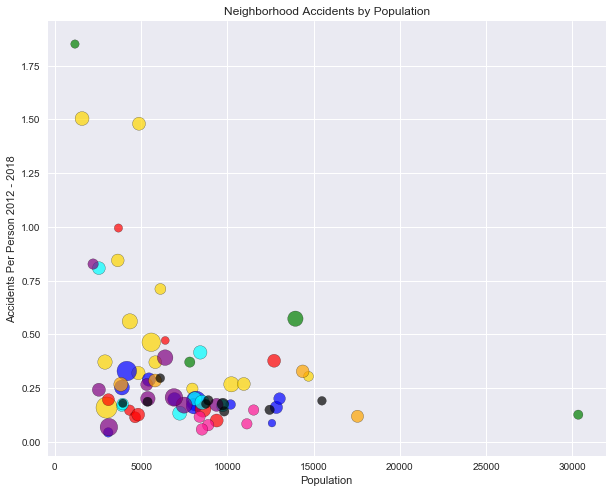

In [26]:
central_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Central']
east_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'East']
north_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'North']
northeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northeast']
northwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northwest']
south_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'South']
southeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southeast']
southwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southwest']
west_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))

central_plot = plt.scatter(central_data['POPULATION_2010'], central_data['ACCIDENTS_PER_PERSON'], c='gold', s=central_data['House Value']/2000, alpha=.7, edgecolor='black')
east_plot = plt.scatter(east_data['POPULATION_2010'], east_data['ACCIDENTS_PER_PERSON'], c='blue', s=east_data['House Value']/2000, alpha=.7, edgecolor='black')
north_plot = plt.scatter(north_data['POPULATION_2010'], north_data['ACCIDENTS_PER_PERSON'], c='red', s=north_data['House Value']/2000, alpha=.7, edgecolor='black')
northeast_plot = plt.scatter(northeast_data['POPULATION_2010'], northeast_data['ACCIDENTS_PER_PERSON'], c='green', s=northeast_data['House Value']/2000, alpha=.7, edgecolor='black')
nortwest_plot = plt.scatter(northwest_data['POPULATION_2010'], northwest_data['ACCIDENTS_PER_PERSON'], c='cyan', s=northwest_data['House Value']/2000, alpha=.7, edgecolor='black')
south_plot = plt.scatter(south_data['POPULATION_2010'], south_data['ACCIDENTS_PER_PERSON'], c='purple', s=south_data['House Value']/2000, alpha=.7, edgecolor='black')
southeast_plot = plt.scatter(southeast_data['POPULATION_2010'], southeast_data['ACCIDENTS_PER_PERSON'], c='orange', s=southeast_data['House Value']/2000, alpha=.7, edgecolor='black')
southwest_plot = plt.scatter(southwest_data['POPULATION_2010'], southwest_data['ACCIDENTS_PER_PERSON'], c='deeppink', s=southwest_data['House Value']/2000, alpha=.7, edgecolor='black')
west_plot = plt.scatter(west_data['POPULATION_2010'], west_data['ACCIDENTS_PER_PERSON'], c='black', s=west_data['House Value']/2000, alpha=.7, edgecolor='black')
#plt.scatter(accidents_by_hood['POPULATION_2010'], accidents_by_hood['ACCIDENT_COUNT'])

plt.xlabel('Population')
plt.ylabel('Accidents Per Person 2012 - 2018')
plt.title ('Neighborhood Accidents by Population')



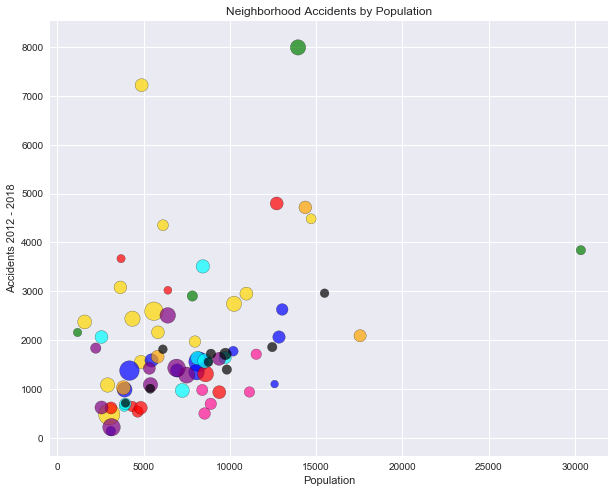

In [27]:

central_datacentral_d  = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Central']
east_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'East']
north_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'North']
northeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northeast']
northwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Northwest']
south_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'South']
southeast_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southeast']
southwest_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'Southwest']
west_data = accidents_by_hood.loc[accidents_by_hood['DENVER_REGION'] == 'West']

sns.set()
plt.figure(figsize=(10,8))

central_plot = plt.scatter(central_data['POPULATION_2010'], central_data['TOTAL_ACCIDENTS'], c='gold', s=central_data['House Value']/2000, alpha=.7, edgecolor='black')
east_plot = plt.scatter(east_data['POPULATION_2010'], east_data['TOTAL_ACCIDENTS'], c='blue', s=east_data['House Value']/2000, alpha=.7, edgecolor='black')
north_plot = plt.scatter(north_data['POPULATION_2010'], north_data['TOTAL_ACCIDENTS'], c='red', s=north_data['House Value']/2000, alpha=.7, edgecolor='black')
northeast_plot = plt.scatter(northeast_data['POPULATION_2010'], northeast_data['TOTAL_ACCIDENTS'], c='green', s=northeast_data['House Value']/2000, alpha=.7, edgecolor='black')
nortwest_plot = plt.scatter(northwest_data['POPULATION_2010'], northwest_data['TOTAL_ACCIDENTS'], c='cyan', s=northwest_data['House Value']/2000, alpha=.7, edgecolor='black')
south_plot = plt.scatter(south_data['POPULATION_2010'], south_data['TOTAL_ACCIDENTS'], c='purple', s=south_data['House Value']/2000, alpha=.7, edgecolor='black')
southeast_plot = plt.scatter(southeast_data['POPULATION_2010'], southeast_data['TOTAL_ACCIDENTS'], c='orange', s=southeast_data['House Value']/2000, alpha=.7, edgecolor='black')
southwest_plot = plt.scatter(southwest_data['POPULATION_2010'], southwest_data['TOTAL_ACCIDENTS'], c='deeppink', s=southwest_data['House Value']/2000, alpha=.7, edgecolor='black')
west_plot = plt.scatter(west_data['POPULATION_2010'], west_data['TOTAL_ACCIDENTS'], c='black', s=west_data['House Value']/2000, alpha=.7, edgecolor='black')
#plt.scatter(accidents_by_hood['POPULATION_2010'], accidents_by_hood['ACCIDENT_COUNT'])

plt.xlabel('Population')
plt.ylabel('Accidents 2012 - 2018')
plt.title ('Neighborhood Accidents by Population')

plt.show()

In [28]:
accidents_by_month = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_month['YEAR'].max() - accidents_by_month['YEAR'].min()
accidents_by_month = accidents_by_month.groupby(['MONTH']).OFFENSE_ID.count().reset_index()
accidents_by_month = accidents_by_month.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_month['AVG_ACC_PER_YEAR'] = accidents_by_month['ACCIDENT_COUNT']/num_years
accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_month

MONTH  ACCIDENT_COUNT  AVG_ACC_PER_YEAR
0     January           11347            2269.4
1    February           10468            2093.6
2       March           10653            2130.6
3       April           10907            2181.4
4         May           11833            2366.6
5        June           11738            2347.6
6        July           10127            2025.4
7      August           11972            2394.4
8   September           12121            2424.2
9     October           12531            2506.2
10   November           11358            2271.6
11   December           11843            2368.6

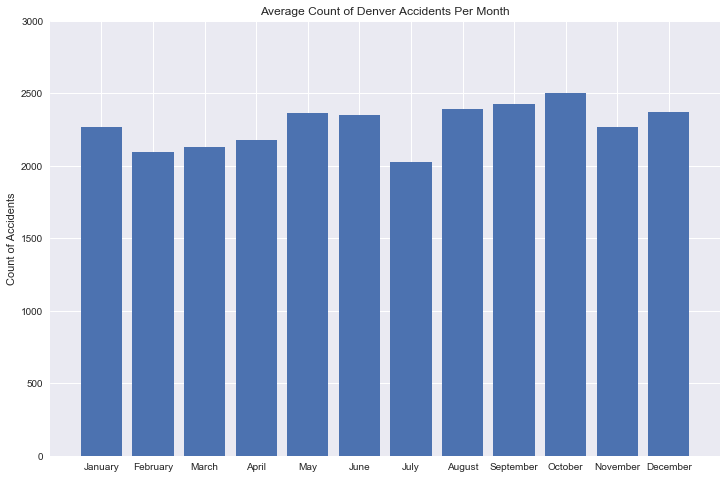

In [29]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_month.index
y_axis = accidents_by_month['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_month.index]
x_labels = accidents_by_month.MONTH
#x_labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
          # 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(tick_locations, x_labels)

plt.title ('Average Count of Denver Accidents Per Month')
plt.ylabel('Count of Accidents')
plt.ylim(0, 3000)

plt.show()

In [30]:
accidents_by_hour = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = accidents_by_hour['YEAR'].max() - accidents_by_hour['YEAR'].min()
accidents_by_hour = accidents_by_hour.groupby(['HOUR']).OFFENSE_ID.count().reset_index()
accidents_by_hour= accidents_by_hour.rename(columns={'OFFENSE_ID': "ACCIDENT_COUNT"})
accidents_by_hour['AVG_ACC_PER_YEAR'] = accidents_by_hour['ACCIDENT_COUNT']/num_years
#accidents_by_month = accidents_by_month.rename(index={'1': 'January'})
#accidents_by_month = accidents_by_month.replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8:'August', 9:'September', 10: 'October', 11: 'November', 12: 'December'})
accidents_by_hour.head()

HOUR  ACCIDENT_COUNT  AVG_ACC_PER_YEAR
0     0            2429             485.8
1     1            2408             481.6
2     2            2826             565.2
3     3            1180             236.0
4     4             885             177.0

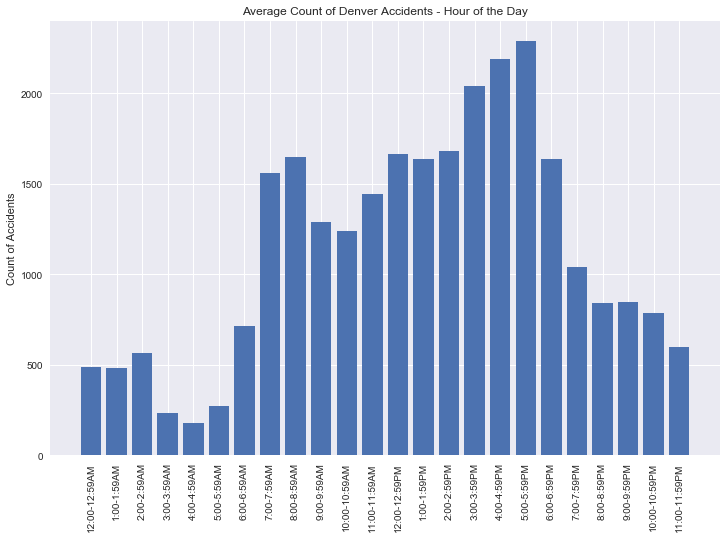

In [31]:
plt.figure(figsize=(12,8))
x_axis = accidents_by_hour.index
y_axis = accidents_by_hour['AVG_ACC_PER_YEAR']
plt.bar(x_axis, y_axis)
tick_locations = [x for x in accidents_by_hour.index]
#x_labels = accidents_by_hour.HOUR
x_labels = ['12:00-12:59AM', '1:00-1:59AM', '2:00-2:59AM', '3:00-3:59AM', '4:00-4:59AM', '5:00-5:59AM', '6:00-6:59AM', '7:00-7:59AM', '8:00-8:59AM',
            '9:00-9:59AM', '10:00-10:59AM', '11:00-11:59AM', '12:00-12:59PM', '1:00-1:59PM', '2:00-2:59PM', '3:00-3:59PM', '4:00-4:59PM', '5:00-5:59PM',
            '6:00-6:59PM', '7:00-7:59PM', '8:00-8:59PM', '9:00-9:59PM', '10:00-10:59PM', '11:00-11:59PM']           
plt.xticks(tick_locations, x_labels, rotation=90)

plt.title ('Average Count of Denver Accidents - Hour of the Day')
plt.ylabel('Count of Accidents')
#plt.ylim(0, 3000)

plt.show()

In [33]:
offense_df = accident_df.groupby('OFFENSE_CATEGORY_ID')['OFFENSE_ID'].count()
offense_df.head()

OFFENSE_CATEGORY_ID
TRAF - ACCIDENT                100870
TRAF - ACCIDENT - DUI/DUID       4658
TRAF - ACCIDENT - FATAL           301
TRAF - ACCIDENT - HIT & RUN     39472
TRAF - ACCIDENT - POLICE         1445
Name: OFFENSE_ID, dtype: int64

In [39]:
bike_accs_df = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = bike_accs_df['YEAR'].max() - bike_accs_df['YEAR'].min()
bike_accs_df = bike_accs_df.groupby('NEIGHBORHOOD_ID')['BICYCLE_IND'].sum().reset_index()
bike_accs_df['AVG_ACCS_PER_YEAR'] = bike_accs_df['BICYCLE_IND']/num_years
bike_accs_df = bike_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
bike_accs_df.head(10)

NEIGHBORHOOD_ID  BICYCLE_IND  AVG_ACCS_PER_YEAR
25         Five Points          130               26.0
9         Capitol Hill          109               21.8
8                  CBD           95               19.0
63       Union Station           92               18.4
47  North Capitol Hill           88               17.6
15        Civic Center           76               15.2
40        Lincoln Park           73               14.6
11       Cheesman Park           62               12.4
35            Highland           61               12.2
59               Speer           58               11.6

In [40]:
ped_accs_df = accident_df.loc[accident_df['YEAR'] < 2018] #Get rid of 2018 data so as not to skew
num_years = ped_accs_df['YEAR'].max() - ped_accs_df['YEAR'].min()
ped_accs_df = ped_accs_df.groupby('NEIGHBORHOOD_ID')['PEDESTRIAN_IND'].sum().reset_index()
ped_accs_df['AVG_ACCS_PER_YEAR'] = ped_accs_df['PEDESTRIAN_IND']/num_years
ped_accs_df = ped_accs_df.sort_values(by='AVG_ACCS_PER_YEAR', ascending=False)
ped_accs_df.head(10)


NEIGHBORHOOD_ID  PEDESTRIAN_IND  AVG_ACCS_PER_YEAR
9     Capitol Hill             203               40.6
63   Union Station             176               35.2
25     Five Points             159               31.8
8              CBD             129               25.8
15    Civic Center             106               21.2
76        Westwood             103               20.6
2            Baker              99               19.8
44       Montbello              89               17.8
11   Cheesman Park              86               17.2
60       Stapleton              86               17.2